# Getting to understand what Linear Regression is

If a father is a certain height, would the father's son also be as tall/short as the father?

Goal is to minimize vertical distance between all data and the line so we can determine the best line, while attempting to minimize distance between all points and distance to our line.

# Project Description
Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the Data

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Column descriptions:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

# Explatory Data Analysis

Important columns are "Time on Website", "Time on App", and "Yearly Amount Spent" because if you spend more time on the website/app, you spend more money.

In [6]:
# Setting visualization styles
sns.set_palette("GnBu_d")
sns.set(style="white", color_codes=True)

Creating a Jointplot to observe correlation between 

(1) Time on Website and Yearly Amount Spent columns.
(2) Time on App and Yearly Amount Spent columns.

C:\Users\Jae\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


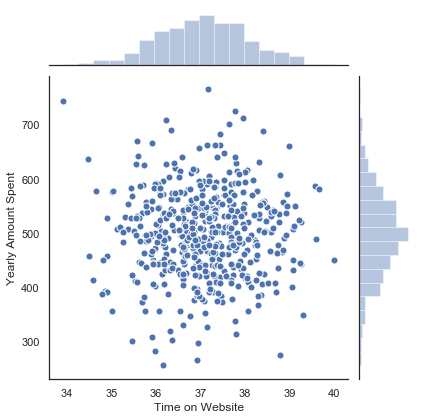

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers, edgecolor="w", s=50)

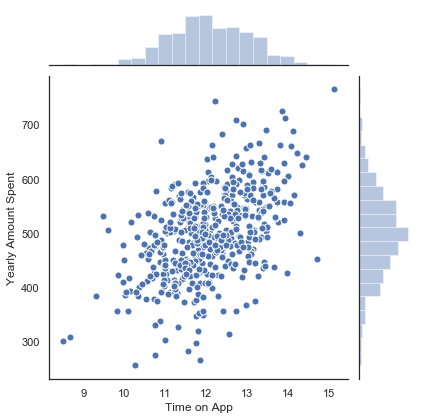

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers, edgecolor="w", s=50)

In [9]:
# Time on App vs Yeearly Amount Spent has more correlation
# Want to compare Time on App and Length of Membership

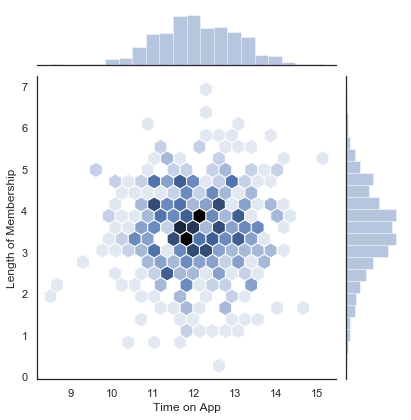

In [10]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers, edgecolor="w")

Using pairplot to quickly observe the relationships between columns

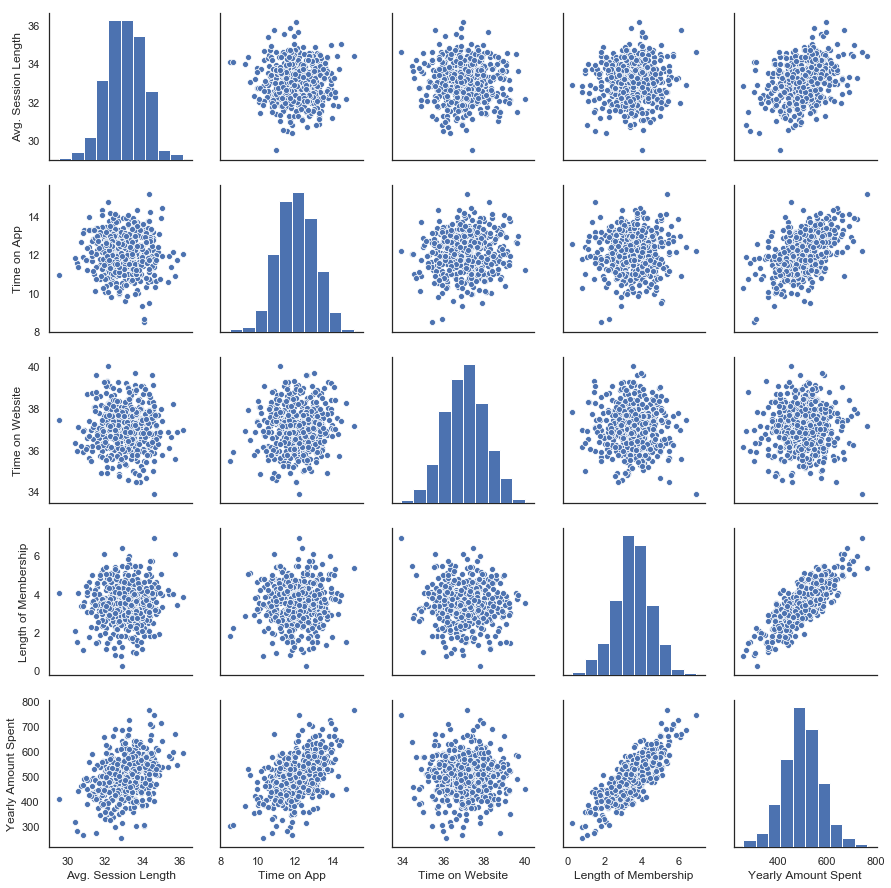

In [11]:
sns.pairplot(customers)

Because "Yearly Amount Spent" is most correlated with "Length of Membership", we want to create a linear model comparing the two columns

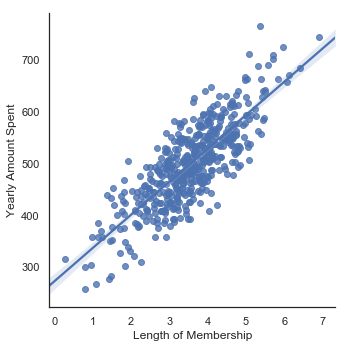

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

# Splitting Training and Testing Data


In [13]:
y = customers['Yearly Amount Spent']

In [14]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Creating an instance of LinearRegression
lm = LinearRegression()

In [19]:
# Train/fitting on training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# printing out coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data

In [21]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

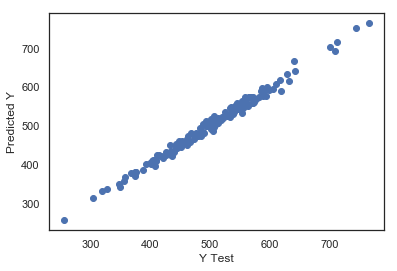

In [22]:
# Scatterplot of real test values vs predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating Model

In [23]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


In [24]:
#the closer the variance is to 100, the better it is
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

# Residuals
Is it normally distributed?

C:\Users\Jae\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


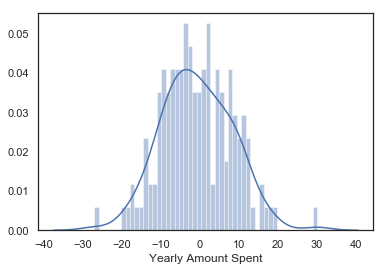

In [25]:
sns.distplot((y_test-predictions),bins=50);

# Summary
Coefficients indicate direction of relationship between real test values and predicted values 

In [26]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.